In [1]:
#Importing necessary modules
import os
import csv
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
#Setting up parameters for the API Key
api_key='KMXu7o4jj9H_5fBmmoxcQUXUcjaIiDMpnabg34SZhyJUQPt-H6y8sfBIq8jI65xOovUH7cKhDpTUnvK2UIFOf1r5864boyx0PCcIwR4QQ1OeR8IWr5RO7UxW3HJoXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}
#Defining the Business Search end point url
url='https://api.yelp.com/v3/businesses/search'

In [2]:
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
# Pulling Restaurant reviews for 4 major Cities 
cities =['New York','San Francisco','Houston','Chicago']
restaurants = []
for city in cities:
    #Pulling 1000 responses for each City ( as 1000 is the allowed limit)
        for offset in range(0,1000,50):
            params = {'term':'restaurants','location':city,'sort_by':'distance','limit':50, 'offset':offset}
            response = requests.get(url, params=params, headers=headers).json()
            restaurants.append(dict(response))

In [3]:
# pprint(restaurants[1])

In [4]:
#Defining empty dictionary to save only required elements
final = {}
#Defining Empty list to append all the data 
data = []

for restaurant in restaurants:
    try:
        for item in restaurant['businesses']:
            final['Restaurant Name'] = item['name']
            final['City'] = item['location']['city']
            final['Rating'] = item['rating']
            final['Reviews'] = item['review_count']
            try:
                final['Price'] = item['price']
            except:
                final['Price'] = float('nan')
            data.append(dict(final))
    except:   
        restaurant['businesses'] = float('nan')

In [5]:
#Creating a DataFrame to save the Rating,Reviews , Price etc for 5000 restaurants per City
restaurants_df = pd.DataFrame(data)
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews
0,Brooklyn,$,4.5,Born & Raised NYC,6
1,New York,NaN,4.0,Landhaus,1
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28


In [6]:
#Dropping Nan values
restaurants_df.dropna(axis='index',how='any',inplace=True)
restaurants_df.reset_index(drop=True)
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews
0,Brooklyn,$,4.5,Born & Raised NYC,6
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28
5,Brooklyn,$$,3.0,Ignazio's,498


In [7]:
restaurants_df['Rating'].value_counts()

4.0    1246
3.5     797
4.5     519
3.0     320
2.5     184
2.0      99
5.0      60
1.5      37
1.0      14
Name: Rating, dtype: int64

In [8]:
newyork_df = restaurants_df[restaurants_df['City']=='New York']
chicago_df = restaurants_df[restaurants_df['City']=='Chicago']
houston_df = restaurants_df[restaurants_df['City']=='Houston']
sanfran_df = restaurants_df[restaurants_df['City']=='San Francisco']
# newyork_df['City'].unique()

# Plotting

In [9]:
restaurants_df['Price Values'] = restaurants_df['Price'].replace({'$': 1,'£': 1, '$$':2,'££': 2, '$$$':3, '$$$$':4})
restaurants_df.head()

,City,Price,Rating,Restaurant Name,Reviews,Price Values
0,Brooklyn,$,4.5,Born & Raised NYC,6,1
2,Brooklyn,$$,4.0,Luke's Lobster Brooklyn Bridge Park,303,2
3,Brooklyn,$$$,4.0,Sugarcane Raw Bar Grill,508,3
4,Brooklyn,$,3.5,Calexico Taco / Burrito Cart,28,1
5,Brooklyn,$$,3.0,Ignazio's,498,2


In [10]:
# Convert Average Rating to List
average_ratings = pd.DataFrame(restaurants_df.groupby('Price Values')['Rating'].mean())
average_rating = average_ratings['Rating'].tolist()
average_rating

[3.541132075471698, 3.7788683602771362, 3.889830508474576, 4.071428571428571]

([<matplotlib.axis.XTick at 0x1bcfd25b9e8>,
 <a list of 4 Text xticklabel objects>)

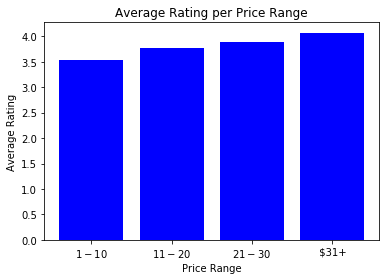

In [11]:
#Plot for Average Rating vs Price Range 
price = ["$1-$10", "$11-$20", "$21-$30", " $31+"]
x_axis = np.arange(len(average_rating))
# average_rating = [3.937057, 3.792747, 3.904517, 4.031915]
plt.bar(x_axis, average_rating, color="b", align="center")
plt.title('Average Rating per Price Range')
plt.ylabel('Average Rating')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, price )

In [12]:
average_reviews = pd.DataFrame(restaurants_df.groupby('Price Values')['Reviews'].mean())
average_review = average_reviews['Reviews'].tolist()
average_review

[162.9011320754717, 411.1258660508083, 631.3559322033898, 335.1666666666667]

([<matplotlib.axis.XTick at 0x1bcfd535c88>,
 <a list of 4 Text xticklabel objects>)

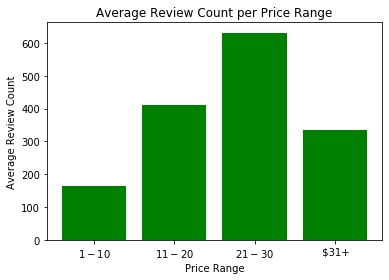

In [13]:
# Plot for Average Reviews for Price Range
# average_reviews = [759.363475, 894.756482, 1135.550308, 1168.212766]
x_axis = np.arange(len(average_review))
plt.bar(x_axis, average_review, color="g", align="center")
plt.title('Average Review Count per Price Range')
plt.ylabel('Average Review Count')
plt.xlabel('Price Range')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, price )

In [14]:
average_reviews_ratings = pd.DataFrame(restaurants_df.groupby('Rating')['Reviews'].mean())
average_reviews_ratings
average_rating = average_reviews_ratings['Reviews'].tolist()

([<matplotlib.axis.XTick at 0x1bcfe629b38>,
 <a list of 8 Text xticklabel objects>)

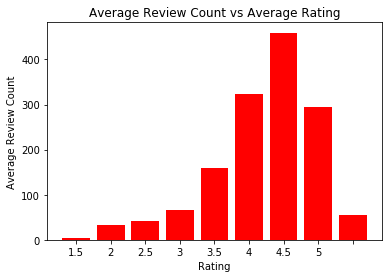

In [15]:
rating = ["1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]

# average_reviews_rating = [300.000000, 429.545455, 547.840909, 657.438017, 805.779777, 1004.157484, 950.435789, 647.750000]
x_axis = np.arange(len(average_rating))
plt.bar(x_axis, average_rating, color="r", align="center")

plt.title('Average Review Count vs Average Rating')
plt.ylabel('Average Review Count')
plt.xlabel('Rating')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, rating )

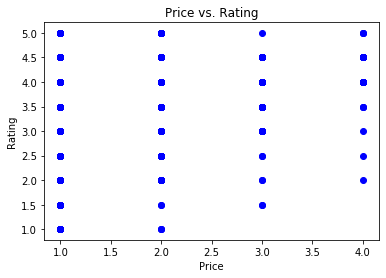

In [16]:
plt.scatter(restaurants_df["Price Values"], restaurants_df["Rating"], color="blue")
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

In [17]:
# Plots of Price vs. Average Number of Reviews

average_reviews = pd.DataFrame(restaurants_df.groupby('Price Values')['Reviews'].mean())
average_reviews

,Reviews
Price Values,
1,162.901132
2,411.125866
3,631.355932
4,335.166667


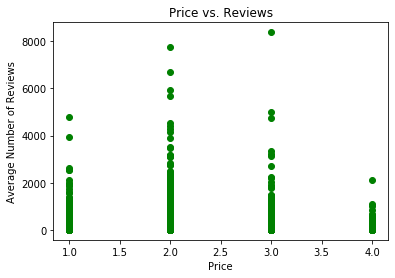

In [18]:
plt.scatter(restaurants_df["Price Values"], restaurants_df["Reviews"], color="green")
plt.title("Price vs. Reviews")
plt.xlabel("Price")
plt.ylabel("Average Number of Reviews")
plt.show()

In [19]:
# Plots of Rating vs. Average Number of Reviews

average_reviews_rating = pd.DataFrame(restaurants_df.groupby('Rating')['Reviews'].mean())
average_reviews_rating

,Reviews
Rating,
1.0,3.357143
1.5,33.243243
2.0,42.525253
2.5,65.641304
3.0,158.303125
3.5,322.318695
4.0,459.188604
4.5,295.152216
5.0,54.966667


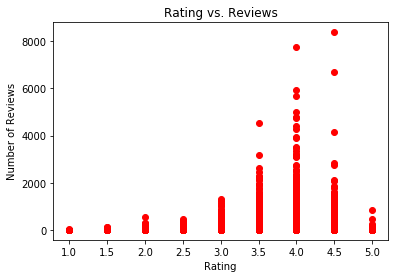

In [20]:
plt.scatter(restaurants_df["Rating"], restaurants_df["Reviews"], color="red")
plt.title("Rating vs. Reviews")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

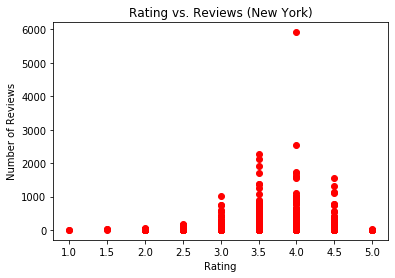

In [21]:
plt.scatter(newyork_df["Rating"], newyork_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (New York)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

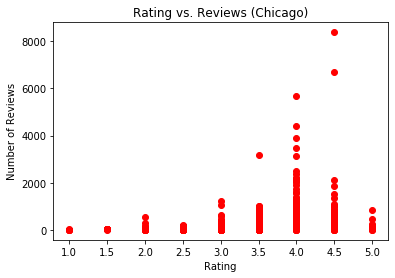

In [22]:
plt.scatter(chicago_df["Rating"], chicago_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Chicago)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

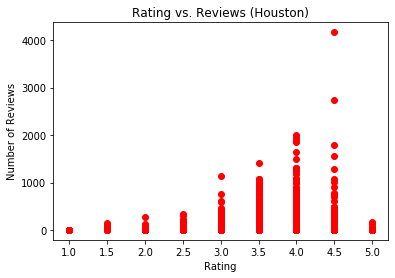

In [23]:
plt.scatter(houston_df["Rating"], houston_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (Houston)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

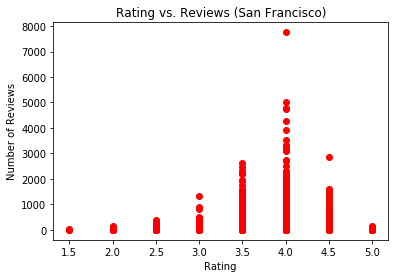

In [24]:
plt.scatter(sanfran_df["Rating"], sanfran_df["Reviews"], color="red")
plt.title("Rating vs. Reviews (San Francisco)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

Text(0.5, 1.0, 'Review Percentage per city')

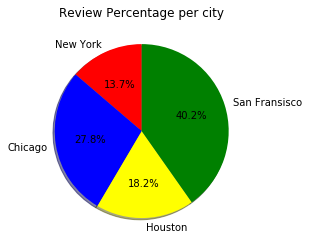

In [25]:
#Pie Chart Review Percentage per city
# newyork_totalreviews = newyork_df['Reviews'].sum()
# chicago_totalreviews = chicago_df['Reviews'].sum()
# houston_totalreviews = houston_df['Reviews'].sum()
# sanfran_totalreviews = sanfran_df['Reviews'].sum()
totalreviews = []
totalreviews.append(newyork_df['Reviews'].sum())
totalreviews.append(chicago_df['Reviews'].sum())
totalreviews.append(houston_df['Reviews'].sum())
totalreviews.append(sanfran_df['Reviews'].sum())
labels = ['New York', 'Chicago','Houston', 'San Fransisco']
colors = ['Red', 'Blue', 'Yellow' , 'Green']
plt.pie(totalreviews, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, shadow = True)
plt.title('Review Percentage per city')
